# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Library untuk data manipulasi
import pandas as pd
import numpy as np

# Library untuk data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing dan machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Library untuk evaluasi machine learning
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
dataset_df = pd.read_csv("https://raw.githubusercontent.com/ThirafiQaedi/dicoding_BMLP_final/refs/heads/main/Dataset_clustering.csv")
#info dataset
print("Informasi Dataset:")
print(dataset_df.info())

print("Dataset data awal:")
dataset_df.head()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionID                2512 non-null   object 
 1   AccountID                    2512 non-null   object 
 2   TransactionAmount            2512 non-null   float64
 3   Location                     2512 non-null   object 
 4   DeviceID                     2512 non-null   object 
 5   IP Address                   2512 non-null   object 
 6   MerchantID                   2512 non-null   object 
 7   CustomerAge                  2512 non-null   float64
 8   TransactionDuration          2512 non-null   float64
 9   LoginAttempts                2512 non-null   float64
 10  AccountBalance               2512 non-null   float64
 11  DayOfWeek                    2512 non-null   int64  
 12  Hour                         2512 non-null   int64  
 13 

,TransactionID,AccountID,TransactionAmount,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,...,Month,DaysSinceLastTransaction,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster,Cluster_PCA
0,TX000001,AC00128,-0.971275,San Diego,D000380,162.198.218.92,M015,1.423718,-0.552443,-0.206794,...,4,-573,True,False,False,False,False,False,1,1
1,TX000002,AC00455,0.269440,Houston,D000051,13.149.61.4,M052,1.311287,0.305314,-0.206794,...,6,-496,True,False,False,False,False,False,1,1
2,TX000003,AC00019,-0.586882,Mesa,D000235,215.97.143.157,M009,-1.443277,-0.909842,-0.206794,...,7,-483,True,False,True,False,False,True,1,1
3,TX000004,AC00070,-0.387456,Raleigh,D000187,200.13.225.150,M002,-1.049768,-1.353017,-0.206794,...,5,-549,True,False,True,False,False,True,1,1
4,TX000005,AC00411,-0.973468,Atlanta,D000308,65.164.3.100,M091,-1.049768,1.120184,-0.206794,...,10,-385,False,False,True,False,False,True,0,1


In [3]:
# Cek missing values
print("\nMissing values per fitur:")
print(dataset_df.isnull().sum())


Missing values per fitur:
TransactionID                  0
AccountID                      0
TransactionAmount              0
Location                       0
DeviceID                       0
IP Address                     0
MerchantID                     0
CustomerAge                    0
TransactionDuration            0
LoginAttempts                  0
AccountBalance                 0
DayOfWeek                      0
Hour                           0
Month                          0
DaysSinceLastTransaction       0
TransactionType_Debit          0
Channel_Branch                 0
Channel_Online                 0
CustomerOccupation_Engineer    0
CustomerOccupation_Retired     0
CustomerOccupation_Student     0
Cluster                        0
Cluster_PCA                    0
dtype: int64


In [4]:
#check duplikat
duplikat = dataset_df.duplicated().sum()
print(f"Number of duplicate rows: {duplikat}")

Number of duplicate rows: 0


In [5]:
dataset_df['Cluster_PCA'].unique()

array([1, 0, 2, 3])

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Memisahkan fitur X dan target y
X = dataset_df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionType_Debit']]
y = dataset_df['Cluster_PCA']  # Label cluster sebagai target

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(2009, 6), y_train=(2009,)
Test set shape: X_test=(503, 6), y_test=(503,)


In [7]:
y_train.unique()
y_train.value_counts()

,count
Cluster_PCA,
1,1986
0,10
3,8
2,5


In [8]:
y_test.unique()
y_test.value_counts()

,count
Cluster_PCA,
1,499
0,2
2,2


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dcct = DecisionTreeClassifier().fit(X_train, y_train)

Penjelasan tentang Algoritma:

- K-Nearest Neighbors (KNN) – Mengklasifikasikan berdasarkan mayoritas dari k tetangga terdekat; sederhana tetapi lambat pada dataset besar.
- Decision Tree (DT) – Membagi data menjadi cabang-cabang berdasarkan kondisi fitur.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [10]:
# pembuatan function untuk evaluasi model
def evaluasi_model(model, X_test, y_test, nama_model):
    # Membuat Prediksi
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    akurasi = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    # Menampilkan hasil dari evaluasi
    print(f"=== Evaluasi {nama_model} ===\n")
    print(f"Akurasi   : {akurasi:.2f}")
    print(f"Precision : {precision:.2f}")
    print(f"Recall    : {recall:.2f}")
    print(f"F1-Score  : {f1:.2f}\n\n")



    # Menampilkan laporan Klasifikasi
    print(f"Laporan Klasifikasi Model {nama_model}:")
    print(classification_report(y_test, y_pred))

    # Membuat Plot heatmap Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Greens", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Label Prediksi ")
    plt.ylabel("Label Asli")
    plt.title(f"Confusion Matrix Model - {nama_model}")
    plt.show()

=== Evaluasi KNN ===

Akurasi   : 0.99
Precision : 0.99
Recall    : 0.99
F1-Score  : 0.99


Laporan Klasifikasi Model KNN:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.99      1.00      1.00       499
           2       0.00      0.00      0.00         2

    accuracy                           0.99       503
   macro avg       0.66      0.50      0.55       503
weighted avg       0.99      0.99      0.99       503



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

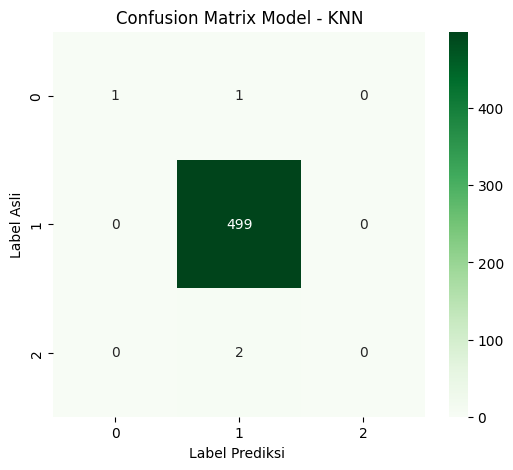

In [11]:
# evaluasi untuk model KNN
evaluasi_model(knn, X_test, y_test, "KNN")

=== Evaluasi decicion tree ===

Akurasi   : 0.99
Precision : 0.98
Recall    : 0.99
F1-Score  : 0.99


Laporan Klasifikasi Model decicion tree:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      0.99      0.99       499
           2       0.00      0.00      0.00         2

    accuracy                           0.99       503
   macro avg       0.33      0.33      0.33       503
weighted avg       0.98      0.99      0.99       503



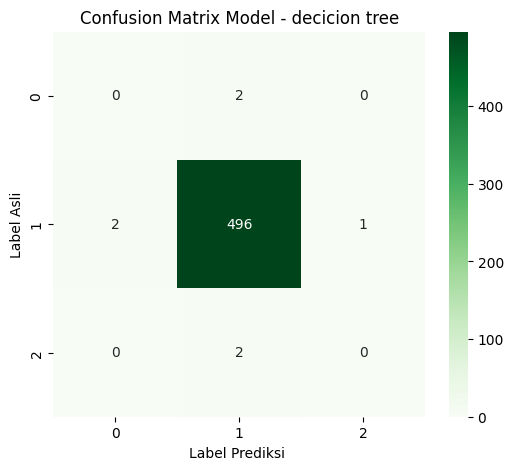

In [12]:
# evaluasi untuk model decicion tree
evaluasi_model(dcct, X_test, y_test, "decicion tree")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **Evaluasi Model Klasifikasi**

### **1. K-Nearest Neighbors (KNN)**
- **Akurasi**: 99%  
- **Precision**: Semua metrik bernilai **0.99** untuk  kelas 1 sedangkan kelas 0 **1** dan kelas 2 bernilai 0.  
- **Recall** : metrik kelas 1 bernilai **1.00** untuk kelas 0 bernilai **0.50** sedangkan kelas 2 nilainya 0.
- **F1-score** : metrik kelas 1 bernilai **1.00** untuk kelas 0 bernilai **0.67** sedangkan kelas 2 nilainya 0.

### **2. Decicion Tree**
- **Akurasi**: 99%  
- **Precision, Recall, F1-score**: Semua metrik bernilai **0.99** untuk  Metrik kelas 1 sedangkan kelas lainnya 0.

---

## **Perbandingan Model**

| Model                | Akurasi | Precision | Recall | F1-score |
|----------------------|---------|-----------|--------|----------|
| KNN                 | 99%   | 0.99            | 0.99         | 0.99    |
| Decicion Tree       | 99%   | 0.98      | 0.99   | 0.99    |

---

## **c. Tuning Model Klasifikasi (Optional)**

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## **1. Hasil evaluasi Model Klasifikasi**
Membandingkan Model Klasifikasi **K-Nearest Neighbors (KNN)** dan **Decicion tree**, berikut hasil evaluasi model:

| Model                | Akurasi | Precision | Recall | F1-score |
|----------------------|---------|-----------|--------|----------|
| KNN                 | 99%   | 0.99            | 0.99         | 0.99    |
| Decicion Tree       | 99%   | 0.98      | 0.99   | 0.99    |

---

###**1. K-Nearest Neighbors (KNN)**
- **Akurasi**: 99%  
- **Precision**: Semua metrik bernilai **0.99** untuk kelas 1 sedangkan kelas 0 bernilai 1 dan kelas 2 bernilai 0.  
- **Recall** : metrik kelas 1 bernilai **1.00** untuk kelas 0 bernilai **0.50** sedangkan kelas 2 nilainya 0.
- **F1-score** : metrik kelas 1 bernilai **1.00** untuk kelas 0 bernilai **0.67** sedangkan kelas 2 nilainya 0.

**Kesimpulan:**  
- **KNN memiliki performa yang baik**, dengan akurasi **99%** dan F1-score **99%**.  


###**2. Decicion Tree**
- **Akurasi**: 99%  
- **Precision, Recall, F1-score**: Semua metrik bernilai **0.99** untuk  Metrik kelas 1 sedangkan kelas lainnya 0.

**Kesimpulan:**  
- **Decicion tree memiliki akurasi sama tinggi **99%**  dan F1-score **99%**. hanya saja untuk presisinya sedikit lebih rendah 98% di banding KNN 99%

  


---

## **2️ Apakah Model Mengalami Overfitting atau Underfitting?**
- **KNN**   
  - model ini menunjukkan tanda **overfitting** di karenakan evaluasinya mendapatkan nilai hampir sempurna 99% yang tidak wajar umumnya.  

- **Decicion tree**  
  - model ini menunjukkan tanda **overfitting** di karenakan evaluasinya mendapatkan nilai hampir sempurna 99% yang tidak wajar umumnya.  

---

## **3. Rekomendasi Tindakan Lanjutan**

1. Tindakan untuk KNN:
  - melakukan Tuning Model Klasifikasi
  - Menggunakan teknik cross-validation untuk mengevaluasi model secara lebih akurat dan menghindari overfitting.
  - menormalisasi data agar jarak antar titik data tidak dipengaruhi oleh skala fitur yang berbeda.
  - Mencoba reduksi dimensi (PCA) untuk melihat apakah model lebih stabil.

2. Tindakan untuk Decision Tree:
  - melakukan Tuning Model Klasifikasi
  - melakukan teknik pruning untuk mengurangi kompleksitas pohon .
  - Batasi kedalaman maksimum pohon untuk mencegah model menjadi terlalu kompleks.
  - Gunakan metode ensemble seperti Random Forest atau Gradient Boosting untuk meningkatkan akurasi dan stabilitas model.

3. Tindakan Lainnya:
  - Menguji Model dengan Data Tambahan atau Data Lain
  - Mencoba Algoritma Lain atau Teknik Regularisasi Lainnya